In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

# **Загрузка данных**

### _Данные представляют собой 150 тысяч винных отзывов с разнообразием, расположением, винодельней, ценой и описанием_

In [72]:
df = pd.read_csv('winemag-data_first150k.csv')

- **country** - cтрана, из которой вино  
- **description** - несколько предложений от сомелье, описывающих вкус, запах, внешний вид, ощущения и - т. д.  
- **designation** - виноградник на винодельне, откуда производится виноград, из которого производится вино  
- **points** - количество баллов WineEnthusiast оценил вино по шкале от 1 до 100  
- **price** - стоимость за бутылку вина  
- **province** - провинция или штат, из которого родом вино  
- **region_1** - Винодельческий район в провинции или штате  
- **region_2** - Иногда есть более конкретные регионы, указанные в пределах винодельческого района  
- **variety** - тип винограда, используемый для изготовления вина  
- **winery** - винодельня  

In [73]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# **Анализ**

### Проверим данные на пропуски

In [74]:
df.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

#### Удалим пропуски в этих двух столбцах, т. к. в столбцах **contry** и **province** всего 5 пропусков, что не повлияет существенно на анализ. А в столбеце **price**  заменим пропуски на среднее значение.

In [75]:
df = df.dropna(subset=['country', 'province'])
df['price'] = df['price'].fillna(df['price'].median())

### Обратим ряд числовых показателей:
- `points` - оценка вина
- `price` - цена за бутылку
#### Средняя оценка вин равна **87.8**, что достаточно близко к значению 50% квантиля, представляющего собой медиану выборки. Отдельно стоит проверить выборку оценок на нормальность
#### Средняя цена за бутылку **33.3** довольно сильно отличается от медианы (50% квартиль), т. к. в выборке есть очень дорогие вина (**2300$**) из-за чего среднее значение выше медианы.

In [76]:
df.describe()

,Unnamed: 0,points,price
count,150925.000000,150925.000000,150925.000000
mean,75464.883048,87.888527,32.303376
std,43569.380289,3.222290,34.735076
min,0.000000,80.000000,4.000000
25%,37733.000000,86.000000,16.000000
50%,75465.000000,88.000000,24.000000
75%,113197.000000,90.000000,38.000000
max,150929.000000,100.000000,2300.000000


#### Удалим из данных вины цена, которых больше 100$

In [77]:
drop_index = df[df['price'] > 100].index
df = df.drop(drop_index)

# **Проверка данных на нормальность** 

### **Визуальный анализ (гистограммы)**

#### Построим гистограммы интеерсующих нас признаков, а также наложим поверх гистограм то, как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.

#### Мы можем видеть, что серьёзные выводы можно сделать только относительно распределения параметра `points` - оно распределено нормально. 

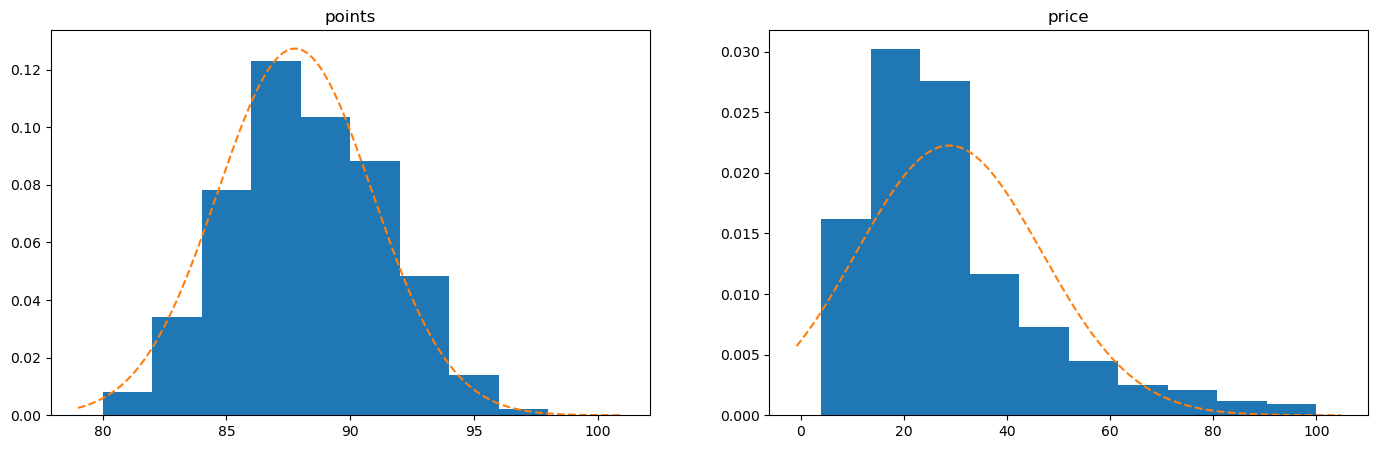

In [78]:
columns = ['points', 'price']

fig, ax = plt.subplots(ncols=len(columns), figsize=(17, 5))

for ind, col in enumerate(columns):
    
    ax[ind].set_title(col)
    ax[ind].hist(df[col], density=True)

    m_df = df[col].mean()
    std_df = df[col].std()

    x_left, x_right = ax[ind].get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=m_df, scale=std_df)

    ax[ind].plot(x, y, linestyle='dashed')

### **Визуальный анализ (квантили)**

#### Построим Q-Q кривую. Это график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением. 

#### Чем ближке график к графику $y=x$, тем более нормальным является распределение значений выборки. 

#### Можем заметить `price` не является распределённым нормально. Тогда как `points` распределён относительно нормально.

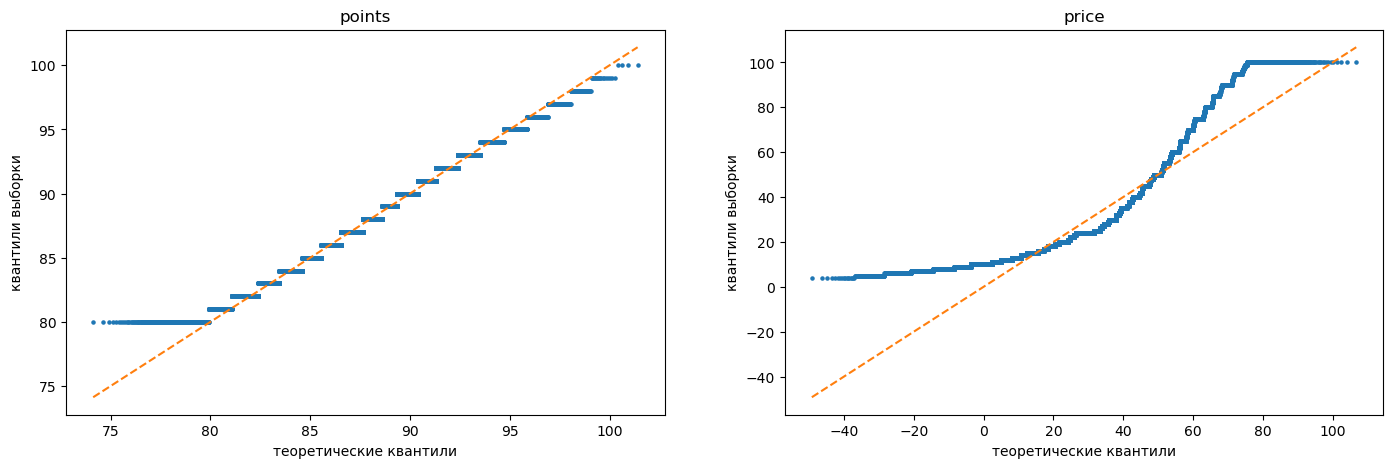

In [79]:
columns = ['points', 'price']

fig, ax = plt.subplots(ncols=len(columns), figsize=(17, 5))

for ind, col in enumerate(columns):
    
    ax[ind].set_title(col)
    ax[ind].set_xlabel('теоретические квантили')
    ax[ind].set_ylabel('квантили выборки')

    m_df = df[col].mean()
    std_df = df[col].std()

    interval = np.linspace(0, 1, df[col].shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=m_df, scale=std_df)
    y = np.quantile(df[col], interval)

    ax[ind].scatter(x, y, s=5)
    ax[ind].plot(x, x, color='C1', linestyle='dashed')

Оценим нормальность выборок также на основании известных характеристик нормального распределения. В частности:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными. 

На основании такой оценки `price` нельзя считать нормально распределенным (в интервал от $\mu - \sigma$ до $\mu + \sigma$ лежат $0.78$).

In [80]:
columns = ['points', 'price']

for col in columns:

    print(col)
    
    m_df = df[col].mean()
    std_df = df[col].std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((df[col] >= m_df - i * std_df) & (df[col] <= m_df + i * std_df)).sum() / df[col].shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

points
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.643476196934762
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.970195307201953
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9994778244947783

price
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7832700393327003
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9383697273836973
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9800488268004882



# **Верно ли, что `дорогоие` вина оценивают иначе, чем другие?**

#### Разделим нашу выборку на две части: дорогие и дешевые вина.

#### Проведём дисперсионный анализ для средний значени оценок по выборке. Так как $F > t$, то можно точно сказать, что оценка действительно зависит от цены. Дорогие (>40$) вина набирают больше баллов, чем вина меньшей стоимости.

In [81]:
def var_analise(df, df1, df2, f):

    all1 = df1.shape[0]
    all2 = df2.shape[0]
    res1_mean = df1[f].mean()
    res2_mean = df2[f].mean()
    res_mean = df[f].mean()
    SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
    SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

    k = 2
    n = all1 + all2
    k1 = k - 1
    k2 = n - k
    sigma2_b = SS_b / k1
    sigma2_w = SS_w / k2
    sigma2_b, sigma2_w

    F = sigma2_b / sigma2_w

    alpha = 0.05

    t = stats.f.ppf(1 - alpha, k1, k2)

    return print(f'F > t: {F > t}')

In [82]:
df_exp = df[df['price'] >= 40]
df_other = df[df['price'] < 40]

var_analise(df, df_exp, df_other, 'points')

F > t: True


In [83]:
m_df_exp = df_exp['points'].mean()
m_df_other = df_other['points'].mean()

print(f'Mean points of expansive wines: {m_df_exp:0.2f}, other country: {m_df_other:0.2f}')

Mean points of expansive wines: 90.21, other country: 87.10


# **Верно ли, что вина из винограда `Sauvignon Blanc` оценивают иначе, чем вина из других сортов винограда?**

#### Так как  $F > t$ , то можно точно сказать, что вина из винограда Sauvignon Blanc оцениваются иначе. Данные вина в среднем хуже, чем остальные.

In [84]:
df_blanc = df[df['variety'] == 'Sauvignon Blanc']
df_other = df[df['variety'] != 'Sauvignon Blanc']

var_analise(df, df_blanc, df_other, 'points')

F > t: True


In [85]:
m_df_blanc = df_blanc['points'].mean()
m_df_other = df_other['points'].mean()

print(f'Mean points of Savignon Blanc wines: {m_df_blanc:0.2f}, other country: {m_df_other:0.2f}')

Mean points of Savignon Blanc wines: 86.83, other country: 87.81


# **Влияет ли страна изготовления на оценку вина?**

#### Проведём анализ зависимости оценки от происхождения вина. Для этого разобъём нашу таблицу на дамми переменные по странам. Построим график корелляции с целевой переменной (points).

#### Как видно и графика корреляция есть, но очень незначительная (< 0.2)

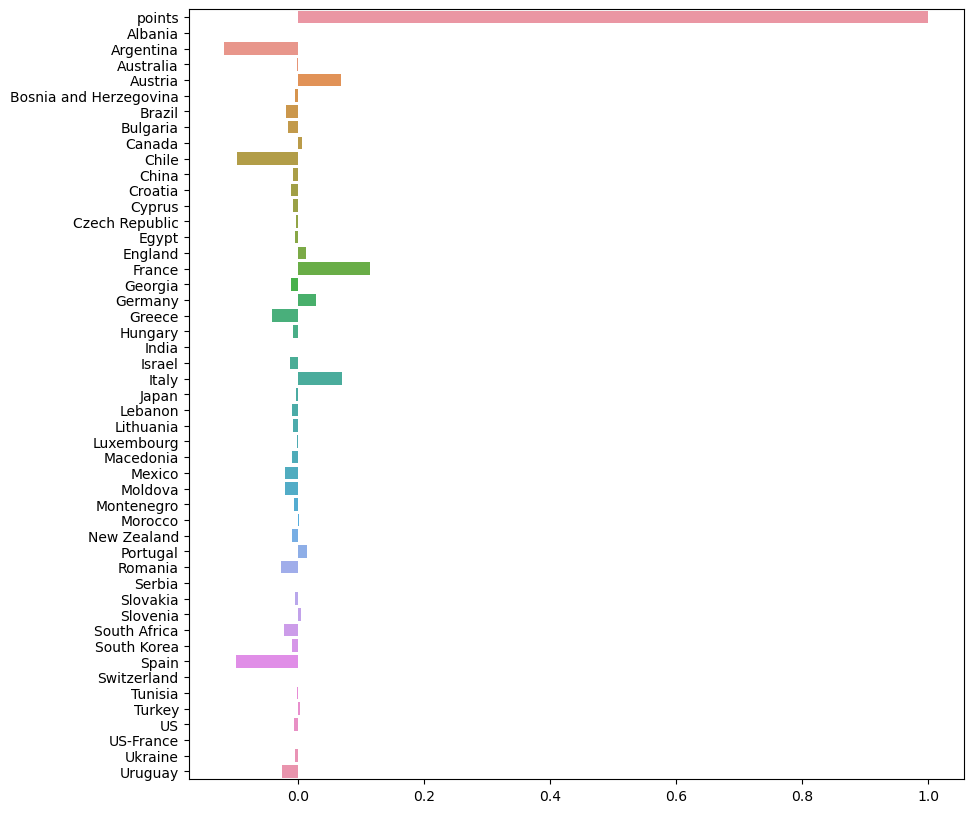

In [86]:
dummy_province = pd.get_dummies(df['country'])
df_points_province = pd.concat([df['points'], dummy_province], axis=1, sort=False)

corr = df_points_province.corrwith(df['points'])

plt.figure(figsize=(10, 10))
sns.barplot(y=corr.index, x=corr);

# **Выводы**

#### Как мы выясниил оценка вин на WineEnthusiast распределенна нормально, чего нельзя сказать о цене. 
#### Это позволило провести дисперсионный анализ закономерностей и выявить, что дорогие вина оценивают лучше, чем дешевые. Их среднее отличает более, чем на 3 балла.
#### Вина, изготовленные из сорта винограда Sauvignon Blanc, получают в среднем меньше баллов, чем вина, изготовленные из других сортов
#### Зависимость между страной изготовления вина и оценкой мы не выявили.